In [68]:
#Is the average temperature recorded for detroit significantly different 
#from the national average temperature?

#First, i'll import my CSV climate file and the necessary libraries i'll need
#to perform my hypothesis

from scipy.stats import ttest_1samp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

det_data = pd.read_csv('Detroit_weather_data.csv')
det_data.head()

,Unnamed: 0,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Avg
0,0,2000,24.5,31.8,44.0,48.0,61.8,69.4,70.2,70.8,62.4,55.0,40.2,19.2,49.8
1,1,2001,26.2,29.7,35.1,51.1,61.2,69.5,73.5,74.1,62.3,52.5,47.5,35.9,51.6
2,2,2002,32.7,32.9,34.8,49.8,54.5,70.8,76.5,73.0,68.8,50.0,39.2,28.7,51.0
3,3,2003,20.5,23.1,35.5,48.3,56.5,66.6,72.6,72.8,63.1,50.9,44.3,33.1,48.9
4,4,2004,19.9,28.5,40.4,50.9,60.8,67.1,71.8,68.5,67.4,53.3,43.0,29.7,50.1


In [25]:
#Let's remove our Year and Avg columns to just get the recordings

parsed_data = det_data.iloc[:, 2:14]
print(parsed_data)

     Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov   Dec
0   24.5  31.8  44.0  48.0  61.8  69.4  70.2  70.8  62.4  55.0  40.2  19.2
1   26.2  29.7  35.1  51.1  61.2  69.5  73.5  74.1  62.3  52.5  47.5  35.9
2   32.7  32.9  34.8  49.8  54.5  70.8  76.5  73.0  68.8  50.0  39.2  28.7
3   20.5  23.1  35.5  48.3  56.5  66.6  72.6  72.8  63.1  50.9  44.3  33.1
4   19.9  28.5  40.4  50.9  60.8  67.1  71.8  68.5  67.4  53.3  43.0  29.7
5   24.1  28.5  33.1  50.7  56.6  74.0  75.4  74.8  68.3  55.2  43.2  25.8
6   35.2  29.8  38.0  52.2  60.7  69.3  76.0  72.9  62.0  49.7  42.5  37.4
7   29.6  19.4  40.1  47.6  61.6  71.3  72.0  73.8  66.7  59.1  40.0  29.6
8   29.0  25.2  33.4  51.8  57.4  70.6  73.2  72.0  66.3  50.6  39.0  27.4
9   17.3  28.5  38.7  49.8  59.5  67.8  68.9  71.2  66.0  50.0  45.3  29.2
10  25.1  27.9  42.4  54.2  62.7  71.4  76.6  75.2  64.5  55.0  42.0  25.6
11  21.9  24.8  35.0  47.3  60.7  70.6  79.3  73.2  64.4  54.4  46.5  35.5
12  30.7  32.6  50.7  49.

In [50]:
#Now lets convert this data into a list
avg_temps = parsed_data.values.tolist()
print(avg_temps)

[[24.5, 31.8, 44.0, 48.0, 61.8, 69.4, 70.2, 70.8, 62.4, 55.0, 40.2, 19.2], [26.2, 29.7, 35.1, 51.1, 61.2, 69.5, 73.5, 74.1, 62.3, 52.5, 47.5, 35.9], [32.7, 32.9, 34.8, 49.8, 54.5, 70.8, 76.5, 73.0, 68.8, 50.0, 39.2, 28.7], [20.5, 23.1, 35.5, 48.3, 56.5, 66.6, 72.6, 72.8, 63.1, 50.9, 44.3, 33.1], [19.9, 28.5, 40.4, 50.9, 60.8, 67.1, 71.8, 68.5, 67.4, 53.3, 43.0, 29.7], [24.1, 28.5, 33.1, 50.7, 56.6, 74.0, 75.4, 74.8, 68.3, 55.2, 43.2, 25.8], [35.2, 29.8, 38.0, 52.2, 60.7, 69.3, 76.0, 72.9, 62.0, 49.7, 42.5, 37.4], [29.6, 19.4, 40.1, 47.6, 61.6, 71.3, 72.0, 73.8, 66.7, 59.1, 40.0, 29.6], [29.0, 25.2, 33.4, 51.8, 57.4, 70.6, 73.2, 72.0, 66.3, 50.6, 39.0, 27.4], [17.3, 28.5, 38.7, 49.8, 59.5, 67.8, 68.9, 71.2, 66.0, 50.0, 45.3, 29.2], [25.1, 27.9, 42.4, 54.2, 62.7, 71.4, 76.6, 75.2, 64.5, 55.0, 42.0, 25.6], [21.9, 24.8, 35.0, 47.3, 60.7, 70.6, 79.3, 73.2, 64.4, 54.4, 46.5, 35.5], [30.7, 32.6, 50.7, 49.4, 65.3, 72.3, 79.0, 73.0, 64.1, 52.7, 40.3, 35.9], [28.7, 27.2, 34.6, 46.5, 63.6, 69.7, 

In [51]:
#Our list seperated into smaller lists organized by Year, however we want just a list of all the 
#average recorded temperatures 

flat_list = []
for lists in avg_temps:
    for nums in lists:
        flat_list.append(nums)

print(flat_list)

[24.5, 31.8, 44.0, 48.0, 61.8, 69.4, 70.2, 70.8, 62.4, 55.0, 40.2, 19.2, 26.2, 29.7, 35.1, 51.1, 61.2, 69.5, 73.5, 74.1, 62.3, 52.5, 47.5, 35.9, 32.7, 32.9, 34.8, 49.8, 54.5, 70.8, 76.5, 73.0, 68.8, 50.0, 39.2, 28.7, 20.5, 23.1, 35.5, 48.3, 56.5, 66.6, 72.6, 72.8, 63.1, 50.9, 44.3, 33.1, 19.9, 28.5, 40.4, 50.9, 60.8, 67.1, 71.8, 68.5, 67.4, 53.3, 43.0, 29.7, 24.1, 28.5, 33.1, 50.7, 56.6, 74.0, 75.4, 74.8, 68.3, 55.2, 43.2, 25.8, 35.2, 29.8, 38.0, 52.2, 60.7, 69.3, 76.0, 72.9, 62.0, 49.7, 42.5, 37.4, 29.6, 19.4, 40.1, 47.6, 61.6, 71.3, 72.0, 73.8, 66.7, 59.1, 40.0, 29.6, 29.0, 25.2, 33.4, 51.8, 57.4, 70.6, 73.2, 72.0, 66.3, 50.6, 39.0, 27.4, 17.3, 28.5, 38.7, 49.8, 59.5, 67.8, 68.9, 71.2, 66.0, 50.0, 45.3, 29.2, 25.1, 27.9, 42.4, 54.2, 62.7, 71.4, 76.6, 75.2, 64.5, 55.0, 42.0, 25.6, 21.9, 24.8, 35.0, 47.3, 60.7, 70.6, 79.3, 73.2, 64.4, 54.4, 46.5, 35.5, 30.7, 32.6, 50.7, 49.4, 65.3, 72.3, 79.0, 73.0, 64.1, 52.7, 40.3, 35.9, 28.7, 27.2, 34.6, 46.5, 63.6, 69.7, 74.0, 71.9, 64.1, 53.3, 37.

In [52]:
#Now let's get the mean from this list
sample_mean = np.mean(flat_list)

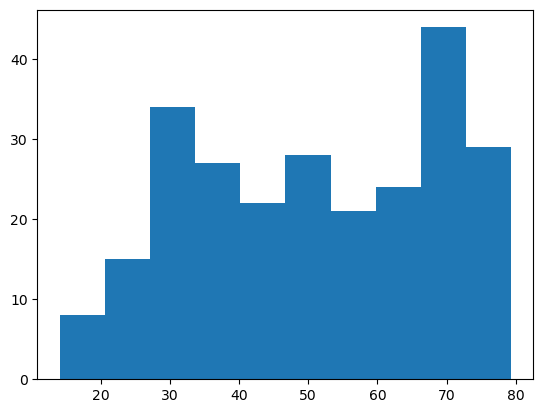

In [69]:
#And now i'll visualize the data to check assumptions that my data is normally distrubted

plt.hist(flat_list)
plt.show()

#Notice that in our plot there is a presence of a bimodial distrubtion 
#that is not a normal bell curve. However for the sake of this project we will still 
#proceed with our test

In [53]:
print(sample_mean)

50.867063492063494


In [ ]:
#Annual average temperature in the U.S for 2023

2023_national_avg_temp = 54.41

#Source = 'https://www.statista.com/statistics/500472/annual-average-temperature-in-the-us/#:~:text=The%20average%20temperature%20in%20the,than%20the%2020th%20century%20average.'

In [87]:
#Given that were comparing a sample average to a population value, i'll perform a one sample t-test
#to calculate the confidence interval with the following Null and Alternative hypothesis

#Null: the sample mean is not signifcantly different from the population mean
#Alternative: The sample mean is significantly different from the population mean

tstat, pval = ttest_1samp(flat_list,54.41)

In [88]:
print(pval)

0.001561527653200933


In [ ]:
#our confidence interval is below 5% and therefore we can assume there is a significant 
#difference between the average temperature in detroit Michigan from 2000-2020 and the 
#national average temperature from 2023.